# Tweet Analysis and Engagement Rate Analysis


In [230]:
#begin by importing all of the relevant packages we will need
import os
import pandas as pd
import tweepy
import re
import string
from textblob import TextBlob
import preprocessor as p
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
set(stopwords.words('english'))
from nltk.tokenize import word_tokenize


from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


#read in the data 
draftkings_data=pd.read_csv('draftkings (1).csv')
fanduel_data=pd.read_csv('fanduel.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/snatchteam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/snatchteam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [231]:
fanduel_data.head()


,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,user,followers,friends,hashtags,place,coordinates,favorites
0,1498786259648626690,Tue Mar 01 22:24:25 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @FanDuel: Where's the lie 😔 https://t.co/pc...,Where 's lie,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.0,en,0,29,"{'id': 4903227911, 'id_str': '4903227911', 'na...",87,392,NaN,FanDuel,"Detroit, MI",NaN
1,1498786247145402369,Tue Mar 01 22:24:22 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",GBO &amp; Ant’s NBA @fanduel picks for 3/1. Re...,GBO amp Ant ’ NBA picks /1 Reply player ’ rost...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.0,en,0,0,"{'id': 1479135531518857219, 'id_str': '1479135...",12,48,"fanduel, dfs, draftkings",FanDuel,NaN,NaN
2,1498786246495064066,Tue Mar 01 22:24:21 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @dkm14: Good Times…… Good times,Good Times…… Good times,"Sentiment(polarity=0.7, subjectivity=0.6000000...",0.700000,0.6,en,0,122,"{'id': 991328720639016961, 'id_str': '99132872...",544,596,NaN,dkm14,"Los Angeles, CA",NaN
3,1498786167520575489,Tue Mar 01 22:24:03 +0000 2022,"<a href=""http://www.robinspost.com/news/"" rel=...","""Sports Betting News: Five Key Takeaways From ...",`` Sports Betting News Five Key Takeaways From...,"Sentiment(polarity=0.0, subjectivity=1.0)",0.000000,1.0,en,0,0,"{'id': 40173650, 'id_str': '40173650', 'name':...",23896,16709,"Results, News",NaN,RT's Are FYI Purposes Only,NaN
4,1498786156871364610,Tue Mar 01 22:24:00 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @DFSAlarm: 🚨🏒 The #NHL #DFS Core Plays are ...,The Core Plays LIVE tonight 's slate dishes to...,"Sentiment(polarity=0.3181818181818182, subject...",0.318182,0.5,en,0,4,"{'id': 1596289489, 'id_str': '1596289489', 'na...",1409,1417,"NHL, DFS","DFSAlarm, andrewkdewhirst","Ontario, Canada",NaN


## runs code to produce the head of both the fanduel and draftking datasets


In [232]:
fanduel_data.tail()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,user,followers,friends,hashtags,place,coordinates,favorites
4140,1498463701308948480,Tue Mar 01 01:02:41 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",@FanDuel @FDSportsbook Yea AB definitely is a ...,Yea AB definitely hall famer whenever ’ prime ...,"Sentiment(polarity=0.0, subjectivity=0.5)",0.0,0.5,en,0,0,"{'id': 1361131475337420802, 'id_str': '1361131...",69,1091,NaN,"FanDuel, FDSportsbook","Newark, NJ",NaN
4141,1498463589631508487,Tue Mar 01 01:02:14 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",@stevensoto805 @RedneaMichael @FanDuel @Bovada...,Lmao fuck,"Sentiment(polarity=0.09999999999999998, subjec...",0.1,0.8,en,0,0,"{'id': 1477424780055695361, 'id_str': '1477424...",31,193,NaN,"stevensoto805, RedneaMichael, FanDuel, BovadaO...",NaN,NaN
4142,1498463470605459458,Tue Mar 01 01:01:46 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",@ClaypoolBrian @FDSportsbook @FanDuel I forgot...,I forgot,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,en,1,0,"{'id': 2576549475, 'id_str': '2576549475', 'na...",219,1540,NaN,"ClaypoolBrian, FDSportsbook, FanDuel","Philipsburg, PA",NaN
4143,1498463467875012613,Tue Mar 01 01:01:45 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",Someone teach me how to bet on FanDuel 😂👀,Someone teach bet FanDuel,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,en,1,0,"{'id': 1268327979794534400, 'id_str': '1268327...",105,160,NaN,NaN,NaN,NaN
4144,1498463430696648715,Tue Mar 01 01:01:36 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",FanDuel let me down so DraftKings is gonna hav...,FanDuel let DraftKings gon na carry,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,en,0,0,"{'id': 1309819681906270208, 'id_str': '1309819...",418,547,NaN,NaN,DMV,NaN


## runs code to produce the tail (bottom 5 rows) of the fanduel dataset


In [233]:
#descriptive statistics 
sumstats=draftkings_data.describe()
#the pandas round function rounds to one decimal place. You can specifiy the number of decimal places inside the pararentheses
sumstats.round()

,id,polarity,subjectivity,favorite_count,retweet_count,followers,friends
count,4.262000e+03,4262.0,4262.0,4262.0,4262.0,4262.0,4262.0
mean,1.498359e+18,0.0,0.0,2.0,18.0,15932.0,1409.0
std,2.816864e+14,0.0,0.0,19.0,122.0,211961.0,6318.0
min,1.497862e+18,-1.0,0.0,0.0,0.0,0.0,0.0
25%,1.498061e+18,0.0,0.0,0.0,0.0,128.0,168.0
50%,1.498392e+18,0.0,0.0,0.0,0.0,592.0,515.0
75%,1.498646e+18,0.0,0.0,1.0,3.0,2506.0,1287.0
max,1.498786e+18,1.0,1.0,1159.0,2760.0,9409166.0,146474.0


## summary of statistical meausres for the draft kings data set

In [234]:
#descriptive statistics 
sumstats=fanduel_data.describe()
#the pandas round function rounds to one decimal place. You can specifiy the number of decimal places inside the pararentheses
sumstats.round()

,id,polarity,subjectivity,favorite_count,retweet_count,followers,friends
count,4.145000e+03,4145.0,4145.0,4145.0,4145.0,4145.0,4145.0
mean,1.498629e+18,0.0,0.0,2.0,13.0,7406.0,949.0
std,1.101840e+14,0.0,0.0,51.0,39.0,106370.0,2840.0
min,1.498463e+18,-1.0,0.0,0.0,0.0,0.0,0.0
25%,1.498509e+18,0.0,0.0,0.0,0.0,69.0,161.0
50%,1.498663e+18,0.0,0.0,0.0,0.0,289.0,433.0
75%,1.498729e+18,0.0,1.0,0.0,2.0,941.0,993.0
max,1.498786e+18,1.0,1.0,2870.0,231.0,6498347.0,146474.0


## summary of statistical meausres for the draft kings data set

In [235]:
#calculate impressions
impressions = fanduel_data["favorite_count"] + fanduel_data["retweet_count"]
fanduel_data["impressions"] = impressions

In [236]:
#calculate impressions
impressions = draftkings_data["favorite_count"] + draftkings_data["retweet_count"]
draftkings_data["impressions"] = impressions

In [237]:
fanduel_data.head()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,user,followers,friends,hashtags,place,coordinates,favorites,impressions
0,1498786259648626690,Tue Mar 01 22:24:25 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @FanDuel: Where's the lie 😔 https://t.co/pc...,Where 's lie,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.0,en,0,29,"{'id': 4903227911, 'id_str': '4903227911', 'na...",87,392,NaN,FanDuel,"Detroit, MI",NaN,29
1,1498786247145402369,Tue Mar 01 22:24:22 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",GBO &amp; Ant’s NBA @fanduel picks for 3/1. Re...,GBO amp Ant ’ NBA picks /1 Reply player ’ rost...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.0,en,0,0,"{'id': 1479135531518857219, 'id_str': '1479135...",12,48,"fanduel, dfs, draftkings",FanDuel,NaN,NaN,0
2,1498786246495064066,Tue Mar 01 22:24:21 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @dkm14: Good Times…… Good times,Good Times…… Good times,"Sentiment(polarity=0.7, subjectivity=0.6000000...",0.700000,0.6,en,0,122,"{'id': 991328720639016961, 'id_str': '99132872...",544,596,NaN,dkm14,"Los Angeles, CA",NaN,122
3,1498786167520575489,Tue Mar 01 22:24:03 +0000 2022,"<a href=""http://www.robinspost.com/news/"" rel=...","""Sports Betting News: Five Key Takeaways From ...",`` Sports Betting News Five Key Takeaways From...,"Sentiment(polarity=0.0, subjectivity=1.0)",0.000000,1.0,en,0,0,"{'id': 40173650, 'id_str': '40173650', 'name':...",23896,16709,"Results, News",NaN,RT's Are FYI Purposes Only,NaN,0
4,1498786156871364610,Tue Mar 01 22:24:00 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @DFSAlarm: 🚨🏒 The #NHL #DFS Core Plays are ...,The Core Plays LIVE tonight 's slate dishes to...,"Sentiment(polarity=0.3181818181818182, subject...",0.318182,0.5,en,0,4,"{'id': 1596289489, 'id_str': '1596289489', 'na...",1409,1417,"NHL, DFS","DFSAlarm, andrewkdewhirst","Ontario, Canada",NaN,4


In [238]:
fanduel_data.tail()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,user,followers,friends,hashtags,place,coordinates,favorites,impressions
4140,1498463701308948480,Tue Mar 01 01:02:41 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",@FanDuel @FDSportsbook Yea AB definitely is a ...,Yea AB definitely hall famer whenever ’ prime ...,"Sentiment(polarity=0.0, subjectivity=0.5)",0.0,0.5,en,0,0,"{'id': 1361131475337420802, 'id_str': '1361131...",69,1091,NaN,"FanDuel, FDSportsbook","Newark, NJ",NaN,0
4141,1498463589631508487,Tue Mar 01 01:02:14 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",@stevensoto805 @RedneaMichael @FanDuel @Bovada...,Lmao fuck,"Sentiment(polarity=0.09999999999999998, subjec...",0.1,0.8,en,0,0,"{'id': 1477424780055695361, 'id_str': '1477424...",31,193,NaN,"stevensoto805, RedneaMichael, FanDuel, BovadaO...",NaN,NaN,0
4142,1498463470605459458,Tue Mar 01 01:01:46 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",@ClaypoolBrian @FDSportsbook @FanDuel I forgot...,I forgot,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,en,1,0,"{'id': 2576549475, 'id_str': '2576549475', 'na...",219,1540,NaN,"ClaypoolBrian, FDSportsbook, FanDuel","Philipsburg, PA",NaN,1
4143,1498463467875012613,Tue Mar 01 01:01:45 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",Someone teach me how to bet on FanDuel 😂👀,Someone teach bet FanDuel,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,en,1,0,"{'id': 1268327979794534400, 'id_str': '1268327...",105,160,NaN,NaN,NaN,NaN,1
4144,1498463430696648715,Tue Mar 01 01:01:36 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",FanDuel let me down so DraftKings is gonna hav...,FanDuel let DraftKings gon na carry,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,en,0,0,"{'id': 1309819681906270208, 'id_str': '1309819...",418,547,NaN,NaN,DMV,NaN,0


In [239]:
#calculate reach
reach = fanduel_data["followers"] + fanduel_data["friends"]
fanduel_data["reach"] = reach

In [240]:
#calculate reach
reach = draftkings_data["followers"] + draftkings_data["friends"]
draftkings_data["reach"] = reach

In [241]:
fanduel_data.head()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,user,followers,friends,hashtags,place,coordinates,favorites,impressions,reach
0,1498786259648626690,Tue Mar 01 22:24:25 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @FanDuel: Where's the lie 😔 https://t.co/pc...,Where 's lie,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.0,en,0,29,"{'id': 4903227911, 'id_str': '4903227911', 'na...",87,392,NaN,FanDuel,"Detroit, MI",NaN,29,479
1,1498786247145402369,Tue Mar 01 22:24:22 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",GBO &amp; Ant’s NBA @fanduel picks for 3/1. Re...,GBO amp Ant ’ NBA picks /1 Reply player ’ rost...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.0,en,0,0,"{'id': 1479135531518857219, 'id_str': '1479135...",12,48,"fanduel, dfs, draftkings",FanDuel,NaN,NaN,0,60
2,1498786246495064066,Tue Mar 01 22:24:21 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @dkm14: Good Times…… Good times,Good Times…… Good times,"Sentiment(polarity=0.7, subjectivity=0.6000000...",0.700000,0.6,en,0,122,"{'id': 991328720639016961, 'id_str': '99132872...",544,596,NaN,dkm14,"Los Angeles, CA",NaN,122,1140
3,1498786167520575489,Tue Mar 01 22:24:03 +0000 2022,"<a href=""http://www.robinspost.com/news/"" rel=...","""Sports Betting News: Five Key Takeaways From ...",`` Sports Betting News Five Key Takeaways From...,"Sentiment(polarity=0.0, subjectivity=1.0)",0.000000,1.0,en,0,0,"{'id': 40173650, 'id_str': '40173650', 'name':...",23896,16709,"Results, News",NaN,RT's Are FYI Purposes Only,NaN,0,40605
4,1498786156871364610,Tue Mar 01 22:24:00 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @DFSAlarm: 🚨🏒 The #NHL #DFS Core Plays are ...,The Core Plays LIVE tonight 's slate dishes to...,"Sentiment(polarity=0.3181818181818182, subject...",0.318182,0.5,en,0,4,"{'id': 1596289489, 'id_str': '1596289489', 'na...",1409,1417,"NHL, DFS","DFSAlarm, andrewkdewhirst","Ontario, Canada",NaN,4,2826


In [242]:
#calculate engagement metric
engagement = fanduel_data["impressions"] / fanduel_data["reach"]
fanduel_data["engagement"] = engagement

In [243]:
#calculate engagement metric
engagement = draftkings_data["impressions"] / draftkings_data["reach"]
draftkings_data["engagement"] = engagement

In [244]:
fanduel_data.head()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,user,followers,friends,hashtags,place,coordinates,favorites,impressions,reach,engagement
0,1498786259648626690,Tue Mar 01 22:24:25 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @FanDuel: Where's the lie 😔 https://t.co/pc...,Where 's lie,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.0,en,0,...,"{'id': 4903227911, 'id_str': '4903227911', 'na...",87,392,NaN,FanDuel,"Detroit, MI",NaN,29,479,0.060543
1,1498786247145402369,Tue Mar 01 22:24:22 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",GBO &amp; Ant’s NBA @fanduel picks for 3/1. Re...,GBO amp Ant ’ NBA picks /1 Reply player ’ rost...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.0,en,0,...,"{'id': 1479135531518857219, 'id_str': '1479135...",12,48,"fanduel, dfs, draftkings",FanDuel,NaN,NaN,0,60,0.000000
2,1498786246495064066,Tue Mar 01 22:24:21 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @dkm14: Good Times…… Good times,Good Times…… Good times,"Sentiment(polarity=0.7, subjectivity=0.6000000...",0.700000,0.6,en,0,...,"{'id': 991328720639016961, 'id_str': '99132872...",544,596,NaN,dkm14,"Los Angeles, CA",NaN,122,1140,0.107018
3,1498786167520575489,Tue Mar 01 22:24:03 +0000 2022,"<a href=""http://www.robinspost.com/news/"" rel=...","""Sports Betting News: Five Key Takeaways From ...",`` Sports Betting News Five Key Takeaways From...,"Sentiment(polarity=0.0, subjectivity=1.0)",0.000000,1.0,en,0,...,"{'id': 40173650, 'id_str': '40173650', 'name':...",23896,16709,"Results, News",NaN,RT's Are FYI Purposes Only,NaN,0,40605,0.000000
4,1498786156871364610,Tue Mar 01 22:24:00 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @DFSAlarm: 🚨🏒 The #NHL #DFS Core Plays are ...,The Core Plays LIVE tonight 's slate dishes to...,"Sentiment(polarity=0.3181818181818182, subject...",0.318182,0.5,en,0,...,"{'id': 1596289489, 'id_str': '1596289489', 'na...",1409,1417,"NHL, DFS","DFSAlarm, andrewkdewhirst","Ontario, Canada",NaN,4,2826,0.001415


In [245]:
#descriptive statistics 
sumstats_engagement=fanduel_data.describe()
#the pandas round function rounds to one decimal place. You can specifiy the number of decimal places inside the pararentheses
sumstats_engagement.round()

,id,polarity,subjectivity,favorite_count,retweet_count,followers,friends,impressions,reach,engagement
count,4.145000e+03,4145.0,4145.0,4145.0,4145.0,4145.0,4145.0,4145.0,4145.0,4141.0
mean,1.498629e+18,0.0,0.0,2.0,13.0,7406.0,949.0,15.0,8355.0,inf
std,1.101840e+14,0.0,0.0,51.0,39.0,106370.0,2840.0,65.0,106583.0,NaN
min,1.498463e+18,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.498509e+18,0.0,0.0,0.0,0.0,69.0,161.0,0.0,301.0,0.0
50%,1.498663e+18,0.0,0.0,0.0,0.0,289.0,433.0,1.0,837.0,0.0
75%,1.498729e+18,0.0,1.0,0.0,2.0,941.0,993.0,4.0,2136.0,0.0
max,1.498786e+18,1.0,1.0,2870.0,231.0,6498347.0,146474.0,2992.0,6500453.0,inf


In [246]:
fanduel_data.tail()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,user,followers,friends,hashtags,place,coordinates,favorites,impressions,reach,engagement
4140,1498463701308948480,Tue Mar 01 01:02:41 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",@FanDuel @FDSportsbook Yea AB definitely is a ...,Yea AB definitely hall famer whenever ’ prime ...,"Sentiment(polarity=0.0, subjectivity=0.5)",0.0,0.5,en,0,...,"{'id': 1361131475337420802, 'id_str': '1361131...",69,1091,NaN,"FanDuel, FDSportsbook","Newark, NJ",NaN,0,1160,0.000000
4141,1498463589631508487,Tue Mar 01 01:02:14 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",@stevensoto805 @RedneaMichael @FanDuel @Bovada...,Lmao fuck,"Sentiment(polarity=0.09999999999999998, subjec...",0.1,0.8,en,0,...,"{'id': 1477424780055695361, 'id_str': '1477424...",31,193,NaN,"stevensoto805, RedneaMichael, FanDuel, BovadaO...",NaN,NaN,0,224,0.000000
4142,1498463470605459458,Tue Mar 01 01:01:46 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",@ClaypoolBrian @FDSportsbook @FanDuel I forgot...,I forgot,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,en,1,...,"{'id': 2576549475, 'id_str': '2576549475', 'na...",219,1540,NaN,"ClaypoolBrian, FDSportsbook, FanDuel","Philipsburg, PA",NaN,1,1759,0.000569
4143,1498463467875012613,Tue Mar 01 01:01:45 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",Someone teach me how to bet on FanDuel 😂👀,Someone teach bet FanDuel,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,en,1,...,"{'id': 1268327979794534400, 'id_str': '1268327...",105,160,NaN,NaN,NaN,NaN,1,265,0.003774
4144,1498463430696648715,Tue Mar 01 01:01:36 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",FanDuel let me down so DraftKings is gonna hav...,FanDuel let DraftKings gon na carry,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,en,0,...,"{'id': 1309819681906270208, 'id_str': '1309819...",418,547,NaN,NaN,DMV,NaN,0,965,0.000000


In [247]:
#calculate engagement rate as a percentage
engagement_rate = fanduel_data["engagement"]*100
fanduel_data["engagement_rate"] = engagement_rate

In [248]:
#calculate engagement rate as a percentage
engagement_rate = draftkings_data["engagement"]*100
draftkings_data["engagement_rate"] = engagement_rate

In [249]:
#export your data to a csv file
fanduel_data.to_csv('fanduelengagement.csv')

In [250]:
#export your data to a csv file
draftkings_data.to_csv('Draftkingsengagement.csv')

In [251]:
fanduel_data.to_excel('fanduelengagement.xlsx')

In [252]:
#creating a summary statistics table for your data
sumstatstable2=draftkings_data.describe()

In [253]:
#creating a summary statistics table for your data
sumstatstable=fanduel_data.describe()

In [254]:
#exporting summary statistics table to excel
sumstatstable2.to_excel('Draftkings_engagement_sumstats.xlsx')

In [255]:
fanduel=fanduel_data
draftkings= draftkings_data

In [256]:
fanduel.head()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,followers,friends,hashtags,place,coordinates,favorites,impressions,reach,engagement,engagement_rate
0,1498786259648626690,Tue Mar 01 22:24:25 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @FanDuel: Where's the lie 😔 https://t.co/pc...,Where 's lie,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.0,en,0,...,87,392,NaN,FanDuel,"Detroit, MI",NaN,29,479,0.060543,6.054280
1,1498786247145402369,Tue Mar 01 22:24:22 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",GBO &amp; Ant’s NBA @fanduel picks for 3/1. Re...,GBO amp Ant ’ NBA picks /1 Reply player ’ rost...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.0,en,0,...,12,48,"fanduel, dfs, draftkings",FanDuel,NaN,NaN,0,60,0.000000,0.000000
2,1498786246495064066,Tue Mar 01 22:24:21 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @dkm14: Good Times…… Good times,Good Times…… Good times,"Sentiment(polarity=0.7, subjectivity=0.6000000...",0.700000,0.6,en,0,...,544,596,NaN,dkm14,"Los Angeles, CA",NaN,122,1140,0.107018,10.701754
3,1498786167520575489,Tue Mar 01 22:24:03 +0000 2022,"<a href=""http://www.robinspost.com/news/"" rel=...","""Sports Betting News: Five Key Takeaways From ...",`` Sports Betting News Five Key Takeaways From...,"Sentiment(polarity=0.0, subjectivity=1.0)",0.000000,1.0,en,0,...,23896,16709,"Results, News",NaN,RT's Are FYI Purposes Only,NaN,0,40605,0.000000,0.000000
4,1498786156871364610,Tue Mar 01 22:24:00 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @DFSAlarm: 🚨🏒 The #NHL #DFS Core Plays are ...,The Core Plays LIVE tonight 's slate dishes to...,"Sentiment(polarity=0.3181818181818182, subject...",0.318182,0.5,en,0,...,1409,1417,"NHL, DFS","DFSAlarm, andrewkdewhirst","Ontario, Canada",NaN,4,2826,0.001415,0.141543


In [257]:
fanduel["draftkings"]=0

In [258]:
fanduel.head()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,friends,hashtags,place,coordinates,favorites,impressions,reach,engagement,engagement_rate,draftkings
0,1498786259648626690,Tue Mar 01 22:24:25 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @FanDuel: Where's the lie 😔 https://t.co/pc...,Where 's lie,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.0,en,0,...,392,NaN,FanDuel,"Detroit, MI",NaN,29,479,0.060543,6.054280,0
1,1498786247145402369,Tue Mar 01 22:24:22 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",GBO &amp; Ant’s NBA @fanduel picks for 3/1. Re...,GBO amp Ant ’ NBA picks /1 Reply player ’ rost...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.0,en,0,...,48,"fanduel, dfs, draftkings",FanDuel,NaN,NaN,0,60,0.000000,0.000000,0
2,1498786246495064066,Tue Mar 01 22:24:21 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @dkm14: Good Times…… Good times,Good Times…… Good times,"Sentiment(polarity=0.7, subjectivity=0.6000000...",0.700000,0.6,en,0,...,596,NaN,dkm14,"Los Angeles, CA",NaN,122,1140,0.107018,10.701754,0
3,1498786167520575489,Tue Mar 01 22:24:03 +0000 2022,"<a href=""http://www.robinspost.com/news/"" rel=...","""Sports Betting News: Five Key Takeaways From ...",`` Sports Betting News Five Key Takeaways From...,"Sentiment(polarity=0.0, subjectivity=1.0)",0.000000,1.0,en,0,...,16709,"Results, News",NaN,RT's Are FYI Purposes Only,NaN,0,40605,0.000000,0.000000,0
4,1498786156871364610,Tue Mar 01 22:24:00 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @DFSAlarm: 🚨🏒 The #NHL #DFS Core Plays are ...,The Core Plays LIVE tonight 's slate dishes to...,"Sentiment(polarity=0.3181818181818182, subject...",0.318182,0.5,en,0,...,1417,"NHL, DFS","DFSAlarm, andrewkdewhirst","Ontario, Canada",NaN,4,2826,0.001415,0.141543,0


In [259]:
fanduel["fanduel"]=1

In [260]:
fanduel.tail()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,hashtags,place,coordinates,favorites,impressions,reach,engagement,engagement_rate,draftkings,fanduel
4140,1498463701308948480,Tue Mar 01 01:02:41 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",@FanDuel @FDSportsbook Yea AB definitely is a ...,Yea AB definitely hall famer whenever ’ prime ...,"Sentiment(polarity=0.0, subjectivity=0.5)",0.0,0.5,en,0,...,NaN,"FanDuel, FDSportsbook","Newark, NJ",NaN,0,1160,0.000000,0.000000,0,1
4141,1498463589631508487,Tue Mar 01 01:02:14 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",@stevensoto805 @RedneaMichael @FanDuel @Bovada...,Lmao fuck,"Sentiment(polarity=0.09999999999999998, subjec...",0.1,0.8,en,0,...,NaN,"stevensoto805, RedneaMichael, FanDuel, BovadaO...",NaN,NaN,0,224,0.000000,0.000000,0,1
4142,1498463470605459458,Tue Mar 01 01:01:46 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",@ClaypoolBrian @FDSportsbook @FanDuel I forgot...,I forgot,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,en,1,...,NaN,"ClaypoolBrian, FDSportsbook, FanDuel","Philipsburg, PA",NaN,1,1759,0.000569,0.056850,0,1
4143,1498463467875012613,Tue Mar 01 01:01:45 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",Someone teach me how to bet on FanDuel 😂👀,Someone teach bet FanDuel,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,en,1,...,NaN,NaN,NaN,NaN,1,265,0.003774,0.377358,0,1
4144,1498463430696648715,Tue Mar 01 01:01:36 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",FanDuel let me down so DraftKings is gonna hav...,FanDuel let DraftKings gon na carry,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,en,0,...,NaN,NaN,DMV,NaN,0,965,0.000000,0.000000,0,1


In [261]:
fanduel['sportsbook'] = 1  # Indicating FanDuel
draftkings['sportsbook'] = 0  # Indicating DraftKings

# Drop the old 'fanduel' and 'draftkings' columns if they exist
fanduel.drop(columns=['fanduel', 'draftkings'], errors='ignore', inplace=True)
draftkings.drop(columns=['fanduel', 'draftkings'], errors='ignore', inplace=True)

# Now concatenate the DataFrames
combined_books = pd.concat([fanduel, draftkings])

# Reset the index of the combined DataFrame, if necessary
combined_books.reset_index(drop=True, inplace=True)

# Now you can display the head of the combined DataFrame
combined_books.head()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,friends,hashtags,place,coordinates,favorites,impressions,reach,engagement,engagement_rate,sportsbook
0,1498786259648626690,Tue Mar 01 22:24:25 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @FanDuel: Where's the lie 😔 https://t.co/pc...,Where 's lie,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.0,en,0,...,392,NaN,FanDuel,"Detroit, MI",NaN,29,479,0.060543,6.054280,1
1,1498786247145402369,Tue Mar 01 22:24:22 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",GBO &amp; Ant’s NBA @fanduel picks for 3/1. Re...,GBO amp Ant ’ NBA picks /1 Reply player ’ rost...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.0,en,0,...,48,"fanduel, dfs, draftkings",FanDuel,NaN,NaN,0,60,0.000000,0.000000,1
2,1498786246495064066,Tue Mar 01 22:24:21 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @dkm14: Good Times…… Good times,Good Times…… Good times,"Sentiment(polarity=0.7, subjectivity=0.6000000...",0.700000,0.6,en,0,...,596,NaN,dkm14,"Los Angeles, CA",NaN,122,1140,0.107018,10.701754,1
3,1498786167520575489,Tue Mar 01 22:24:03 +0000 2022,"<a href=""http://www.robinspost.com/news/"" rel=...","""Sports Betting News: Five Key Takeaways From ...",`` Sports Betting News Five Key Takeaways From...,"Sentiment(polarity=0.0, subjectivity=1.0)",0.000000,1.0,en,0,...,16709,"Results, News",NaN,RT's Are FYI Purposes Only,NaN,0,40605,0.000000,0.000000,1
4,1498786156871364610,Tue Mar 01 22:24:00 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @DFSAlarm: 🚨🏒 The #NHL #DFS Core Plays are ...,The Core Plays LIVE tonight 's slate dishes to...,"Sentiment(polarity=0.3181818181818182, subject...",0.318182,0.5,en,0,...,1417,"NHL, DFS","DFSAlarm, andrewkdewhirst","Ontario, Canada",NaN,4,2826,0.001415,0.141543,1


In [262]:
combined_books.head()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,friends,hashtags,place,coordinates,favorites,impressions,reach,engagement,engagement_rate,sportsbook
0,1498786259648626690,Tue Mar 01 22:24:25 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @FanDuel: Where's the lie 😔 https://t.co/pc...,Where 's lie,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.0,en,0,...,392,NaN,FanDuel,"Detroit, MI",NaN,29,479,0.060543,6.054280,1
1,1498786247145402369,Tue Mar 01 22:24:22 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",GBO &amp; Ant’s NBA @fanduel picks for 3/1. Re...,GBO amp Ant ’ NBA picks /1 Reply player ’ rost...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.0,en,0,...,48,"fanduel, dfs, draftkings",FanDuel,NaN,NaN,0,60,0.000000,0.000000,1
2,1498786246495064066,Tue Mar 01 22:24:21 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @dkm14: Good Times…… Good times,Good Times…… Good times,"Sentiment(polarity=0.7, subjectivity=0.6000000...",0.700000,0.6,en,0,...,596,NaN,dkm14,"Los Angeles, CA",NaN,122,1140,0.107018,10.701754,1
3,1498786167520575489,Tue Mar 01 22:24:03 +0000 2022,"<a href=""http://www.robinspost.com/news/"" rel=...","""Sports Betting News: Five Key Takeaways From ...",`` Sports Betting News Five Key Takeaways From...,"Sentiment(polarity=0.0, subjectivity=1.0)",0.000000,1.0,en,0,...,16709,"Results, News",NaN,RT's Are FYI Purposes Only,NaN,0,40605,0.000000,0.000000,1
4,1498786156871364610,Tue Mar 01 22:24:00 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @DFSAlarm: 🚨🏒 The #NHL #DFS Core Plays are ...,The Core Plays LIVE tonight 's slate dishes to...,"Sentiment(polarity=0.3181818181818182, subject...",0.318182,0.5,en,0,...,1417,"NHL, DFS","DFSAlarm, andrewkdewhirst","Ontario, Canada",NaN,4,2826,0.001415,0.141543,1


In [263]:
combined_books.tail()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,friends,hashtags,place,coordinates,favorites,impressions,reach,engagement,engagement_rate,sportsbook
8402,1497874178233577472,Sun Feb 27 10:00:07 +0000 2022,"<a href=""https://help.twitter.com/en/using-twi...",$DKNG | Draftkings Inc. Class A Common Stock $...,DKNG Draftkings Inc. Class A Common Stock DKNG...,"Sentiment(polarity=-0.3, subjectivity=0.5)",-0.300000,0.500000,en,0,...,4,NaN,NaN,La Jolla,NaN,0,1995,0.000000,0.000000,0
8403,1497871872482062339,Sun Feb 27 09:50:58 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...","RT @sbnGrizzlies: Ja Morant: The Memphis MVP, ...",Ja Morant The Memphis MVP,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,0,...,777,NaN,"sbnGrizzlies, bcabraham",⠀⠀ ⠀᠀ lucas ⊹ wayv,NaN,49,1604,0.030549,3.054863,0
8404,1497867464020938758,Sun Feb 27 09:33:27 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",this will actually bring me back to Draftkings...,actually bring back Draftkings wizards Sato go...,"Sentiment(polarity=0.13333333333333333, subjec...",0.133333,0.266667,en,0,...,616,NaN,NaN,"Texas, USA",NaN,0,1121,0.000000,0.000000,0
8405,1497863804772057088,Sun Feb 27 09:18:54 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",I told y’all off the jump to keep your eyes on...,I told ’ jump keep eyes ⁦⁩ ⁦⁩ great core playe...,"Sentiment(polarity=0.8, subjectivity=0.75)",0.800000,0.750000,en,1,...,2450,NaN,"JaMorant, memgrizz","Arlington, TX",NaN,1,3203,0.000312,0.031221,0
8406,1497862323087753217,Sun Feb 27 09:13:01 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",@DraftKings Yes… Playing with 🐅 &gt; never pla...,Yes… Playing gt never playing golf,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,5,...,564,NaN,DraftKings,"Overland Park, KS",NaN,5,1165,0.004292,0.429185,0


In [264]:
#calculate impressions
impressions = combined_books["favorite_count"] + combined_books["retweet_count"]
combined_books["impressions"] = impressions

In [265]:
combined_books.tail()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,friends,hashtags,place,coordinates,favorites,impressions,reach,engagement,engagement_rate,sportsbook
8402,1497874178233577472,Sun Feb 27 10:00:07 +0000 2022,"<a href=""https://help.twitter.com/en/using-twi...",$DKNG | Draftkings Inc. Class A Common Stock $...,DKNG Draftkings Inc. Class A Common Stock DKNG...,"Sentiment(polarity=-0.3, subjectivity=0.5)",-0.300000,0.500000,en,0,...,4,NaN,NaN,La Jolla,NaN,0,1995,0.000000,0.000000,0
8403,1497871872482062339,Sun Feb 27 09:50:58 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...","RT @sbnGrizzlies: Ja Morant: The Memphis MVP, ...",Ja Morant The Memphis MVP,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,0,...,777,NaN,"sbnGrizzlies, bcabraham",⠀⠀ ⠀᠀ lucas ⊹ wayv,NaN,49,1604,0.030549,3.054863,0
8404,1497867464020938758,Sun Feb 27 09:33:27 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",this will actually bring me back to Draftkings...,actually bring back Draftkings wizards Sato go...,"Sentiment(polarity=0.13333333333333333, subjec...",0.133333,0.266667,en,0,...,616,NaN,NaN,"Texas, USA",NaN,0,1121,0.000000,0.000000,0
8405,1497863804772057088,Sun Feb 27 09:18:54 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",I told y’all off the jump to keep your eyes on...,I told ’ jump keep eyes ⁦⁩ ⁦⁩ great core playe...,"Sentiment(polarity=0.8, subjectivity=0.75)",0.800000,0.750000,en,1,...,2450,NaN,"JaMorant, memgrizz","Arlington, TX",NaN,1,3203,0.000312,0.031221,0
8406,1497862323087753217,Sun Feb 27 09:13:01 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",@DraftKings Yes… Playing with 🐅 &gt; never pla...,Yes… Playing gt never playing golf,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,5,...,564,NaN,DraftKings,"Overland Park, KS",NaN,5,1165,0.004292,0.429185,0


In [266]:
combined_books.head()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,friends,hashtags,place,coordinates,favorites,impressions,reach,engagement,engagement_rate,sportsbook
0,1498786259648626690,Tue Mar 01 22:24:25 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @FanDuel: Where's the lie 😔 https://t.co/pc...,Where 's lie,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.0,en,0,...,392,NaN,FanDuel,"Detroit, MI",NaN,29,479,0.060543,6.054280,1
1,1498786247145402369,Tue Mar 01 22:24:22 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",GBO &amp; Ant’s NBA @fanduel picks for 3/1. Re...,GBO amp Ant ’ NBA picks /1 Reply player ’ rost...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.0,en,0,...,48,"fanduel, dfs, draftkings",FanDuel,NaN,NaN,0,60,0.000000,0.000000,1
2,1498786246495064066,Tue Mar 01 22:24:21 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @dkm14: Good Times…… Good times,Good Times…… Good times,"Sentiment(polarity=0.7, subjectivity=0.6000000...",0.700000,0.6,en,0,...,596,NaN,dkm14,"Los Angeles, CA",NaN,122,1140,0.107018,10.701754,1
3,1498786167520575489,Tue Mar 01 22:24:03 +0000 2022,"<a href=""http://www.robinspost.com/news/"" rel=...","""Sports Betting News: Five Key Takeaways From ...",`` Sports Betting News Five Key Takeaways From...,"Sentiment(polarity=0.0, subjectivity=1.0)",0.000000,1.0,en,0,...,16709,"Results, News",NaN,RT's Are FYI Purposes Only,NaN,0,40605,0.000000,0.000000,1
4,1498786156871364610,Tue Mar 01 22:24:00 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @DFSAlarm: 🚨🏒 The #NHL #DFS Core Plays are ...,The Core Plays LIVE tonight 's slate dishes to...,"Sentiment(polarity=0.3181818181818182, subject...",0.318182,0.5,en,0,...,1417,"NHL, DFS","DFSAlarm, andrewkdewhirst","Ontario, Canada",NaN,4,2826,0.001415,0.141543,1


In [267]:
#calculate reach
reach = combined_books["followers"] + combined_books["friends"]
combined_books["reach"] = reach 

In [268]:
#calculate engagement metric
engagement = combined_books["impressions"] / combined_books["reach"]
combined_books["engagement"] = engagement

In [269]:
#calculate engagement rate as a percentage
engagement_rate = combined_books["engagement"]*100
combined_books["engagement_rate"] = engagement_rate

In [270]:
combined_books.to_excel('books_tweetdata.xlsx')
#downloading combined books as excel

In [271]:
combined_books.to_csv('books_tweetdata.csv')
#downloading combined books as csv

<Axes: xlabel='friends', ylabel='retweet_count'>

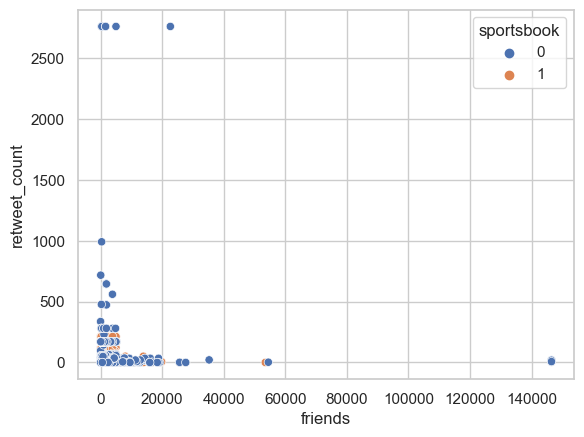

In [272]:
sns.scatterplot(data=combined_books, x="friends", y="retweet_count", hue="sportsbook")
#creating scatter plot of friends by retweetcount colored by sports book 0= Draft Kings 1= Fanduel

/Users/snatchteam/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


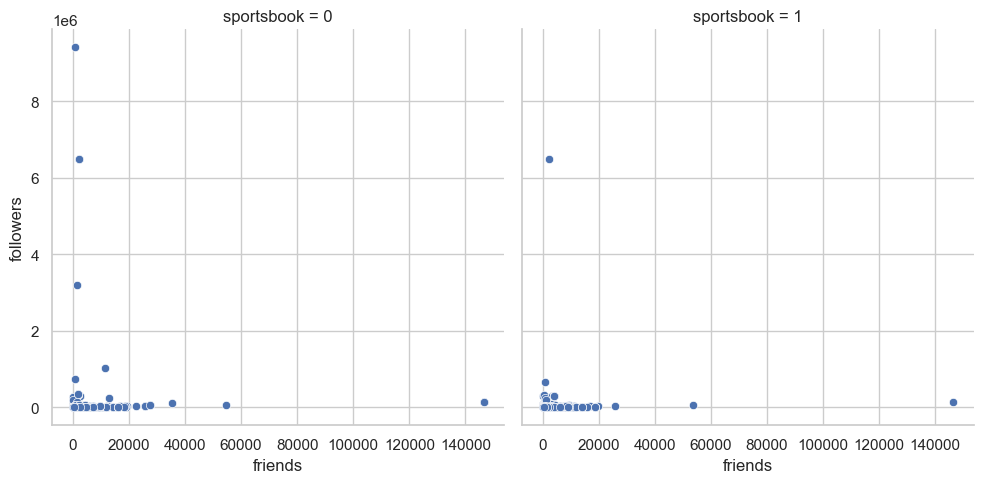

In [273]:
sns.relplot(
    data=combined_books, x="friends", y="followers",
    col="sportsbook", kind="scatter")

/Users/snatchteam/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


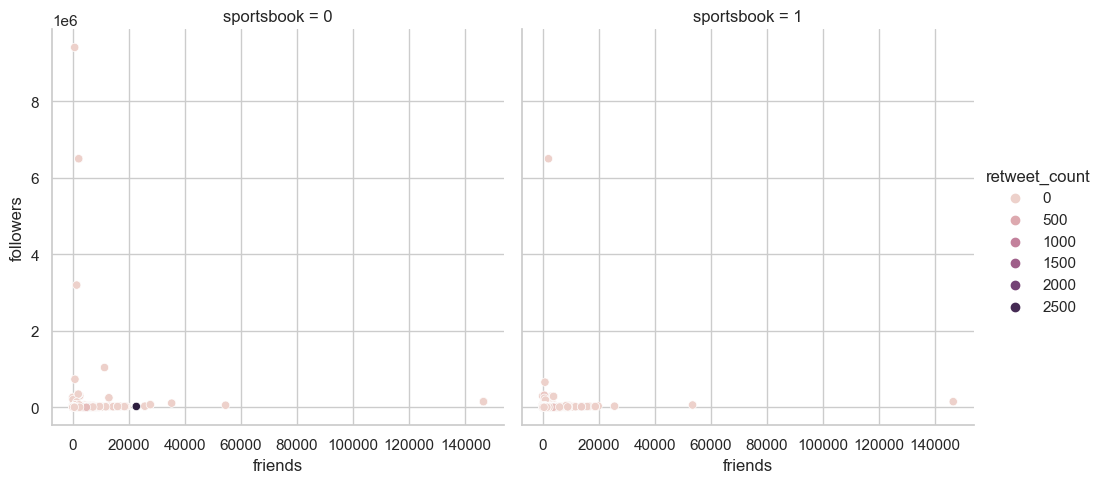

In [274]:
sns.relplot(
    data=combined_books, x="friends", y="followers",
    col="sportsbook", kind="scatter", hue="retweet_count")

In [277]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import builtins
print = builtins.print
# Read the data
sportsbooks_tweet = pd.read_csv('books_tweetdata.csv')

# Selecting relevant columns for regression
selected_columns = ['polarity', 'subjectivity', 'favorite_count', 'retweet_count', 'followers',
                    'friends', 'impressions', 'engagement', 'sportsbook']

# Creating a new DataFrame with selected columns
regression_data = sportsbooks_tweet[selected_columns]

# Check for missing values
missing_values = regression_data.isnull().sum()
if missing_values.sum() > 0:
    print("Missing values detected, handling them...")
    regression_data.dropna(inplace=True)  # Drop rows with missing values
    print("Missing values handled.")

# Check for infinite values
if not np.isfinite(regression_data).all().all():
    print("Infinite values detected, handling them...")
    regression_data.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinite values with NaN
    regression_data.dropna(inplace=True)  # Drop rows with NaN values
    print("Infinite values handled.")

# Splitting the data into independent variables (X) and the dependent variable (y)
X = regression_data.drop(columns=['engagement'])  # Independent variables
y = regression_data['engagement']  # Dependent variable

# Adding a constant to the independent variables (for the intercept term)
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Printing the model summary
print(model.summary())

Missing values detected, handling them...
Missing values handled.
Infinite values detected, handling them...
Infinite values handled.
                            OLS Regression Results                            
Dep. Variable:             engagement   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     20.23
Date:                Thu, 09 May 2024   Prob (F-statistic):           4.04e-27
Time:                        00:00:56   Log-Likelihood:                -14948.
No. Observations:                8367   AIC:                         2.991e+04
Df Residuals:                    8359   BIC:                         2.997e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      

/var/folders/44/gpg78n0566d1rhn7095p97mw0000gn/T/ipykernel_73420/3260635236.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_data.dropna(inplace=True)  # Drop rows with missing values
/var/folders/44/gpg78n0566d1rhn7095p97mw0000gn/T/ipykernel_73420/3260635236.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_data.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinite values with NaN
/var/folders/44/gpg78n0566d1rhn7095p97mw0000gn/T/ipykernel_73420/3260635236.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

In [281]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import builtins
print = builtins.print
# Read the data
sportsbooks_tweet = pd.read_csv('books_tweetdata.csv')

# Selecting relevant columns for regression
selected_columns = ['polarity', 'subjectivity','engagement_rate','friends', 'followers', 'impressions',
                   'favorite_count', 'retweet_count','engagement', 'sportsbook']

# Creating a new DataFrame with selected columns
regression_data = sportsbooks_tweet[selected_columns]

# Check for and handle missing values
missing_values = regression_data.isnull().sum()
if missing_values.sum() > 0:
    print(f"Missing values detected:\n{missing_values[missing_values > 0]}")
    regression_data = regression_data.dropna()  # Drop rows with missing values
    print("Missing values handled.")

# Check for and handle infinite values
if not np.isfinite(regression_data).all().all():
    print("Infinite values detected, handling them...")
    regression_data = regression_data.replace([np.inf, -np.inf], np.nan).dropna()  # Replace infinite values with NaN and drop them
    print("Infinite values handled.")

# Splitting the data into independent variables (X) and the dependent variable (y)
X = regression_data.drop(columns=['engagement'])  # Independent variables
y = regression_data['engagement']  # Dependent variable

# Adding a constant to the independent variables (for the intercept term)
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Printing the model summary
print(model.summary2())
with open('regression_analysis_summary2.txt', 'w') as file:
    file.write(model.summary2().as_text())

Missing values detected:
engagement_rate    12
engagement         12
dtype: int64
Missing values handled.
Infinite values detected, handling them...
Infinite values handled.
                      Results: Ordinary least squares
Model:                 OLS                Adj. R-squared:       1.000       
Dependent Variable:    engagement         AIC:                  -457308.2832
Date:                  2024-05-09 00:02   BIC:                  -457244.9948
No. Observations:      8367               Log-Likelihood:       2.2866e+05  
Df Model:              8                  F-statistic:          2.069e+28   
Df Residuals:          8358               Prob (F-statistic):   0.00        
R-squared:             1.000              Scale:                1.0720e-25  
----------------------------------------------------------------------------
                 Coef.  Std.Err.          t           P>|t|   [0.025  0.975]
----------------------------------------------------------------------------
co

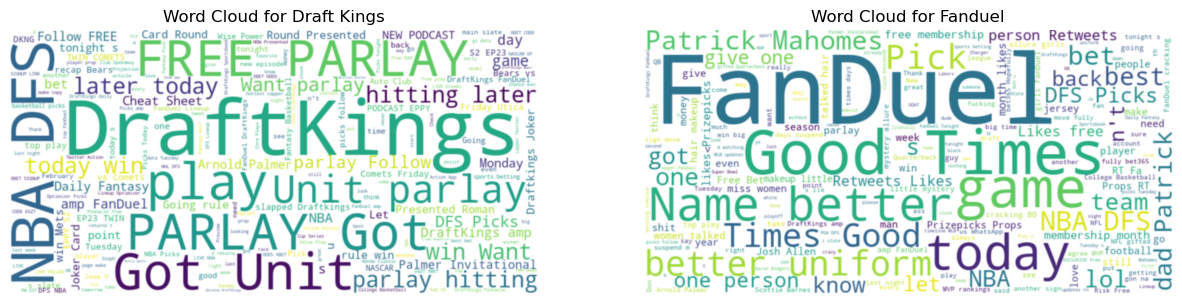

In [75]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Splitting the DataFrame into two groups based on the 'sports_books' column
if isinstance(sportsbooks_tweet, pd.DataFrame) and 'clean_text' in sportsbooks_tweet.columns and 'sportsbook' in sportsbooks_tweet.columns:
    # Ensuring all text data is string and handling NaNs
    sportsbooks_tweet['clean_text'] = sportsbooks_tweet['clean_text'].fillna('').astype(str)

    # Splitting the DataFrame into two groups based on the 'sportsbook' column
    group_0_text = ' '.join(sportsbooks_tweet[sportsbooks_tweet['sportsbook'] == 0]['clean_text'])
    group_1_text = ' '.join(sportsbooks_tweet[sportsbooks_tweet['sportsbook'] == 1]['clean_text'])

    # Generating word clouds for each group
    wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate(group_0_text)
    wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(group_1_text)

    # Plotting the word clouds
    plt.figure(figsize=(15, 10))  # Increased figure size for better visualization

    plt.subplot(1, 2, 1)  # Subplot 1 for the first group
    plt.imshow(wordcloud_0, interpolation='bicubic')
    plt.axis('off')
    plt.title('Word Cloud for Draft Kings')

    plt.subplot(1, 2, 2)  # Subplot 2 for the second group
    plt.imshow(wordcloud_1, interpolation='bicubic')
    plt.axis('off')
    plt.title('Word Cloud for Fanduel')

    plt.show()

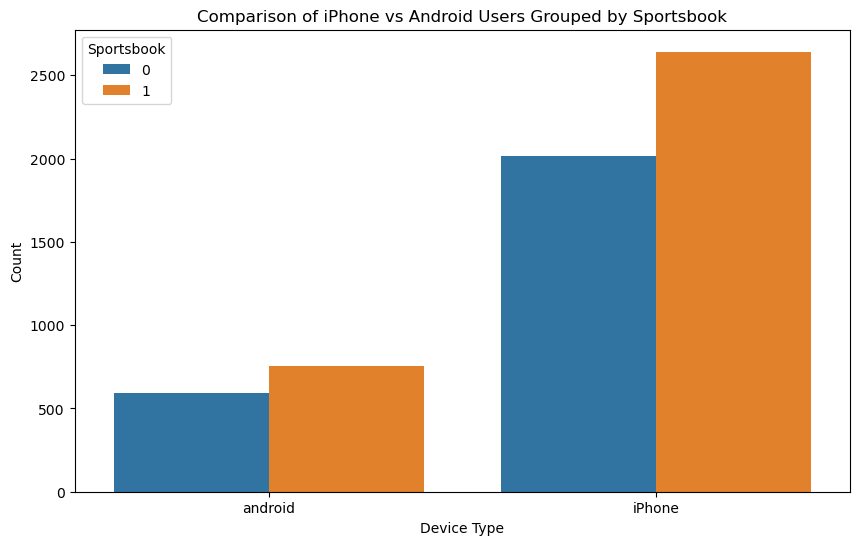

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame here
# For example: df = pd.read_csv('your_dataset.csv')
# Assuming your DataFrame is already loaded as `df`

# Filter rows where 'source' contains 'iPhone' or 'android'
sportsbooks_tweet['device'] =sportsbooks_tweet['source'].apply(lambda x: 'iPhone' if 'iphone' in x.lower() else ('android' if 'android' in x.lower() else None))
filtered_df =sportsbooks_tweet[sportsbooks_tweet['device'].notna()]

# Group by 'device' and 'sportsbook' and count occurrences
device_counts = filtered_df.groupby(['device', 'sportsbook']).size().reset_index(name='counts')

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(data=device_counts, x='device', y='counts', hue='sportsbook')
plt.title('Comparison of iPhone vs Android Users Grouped by Sportsbook')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.legend(title='Sportsbook')
plt.show()

In [208]:
def get_device_type(source):
    if 'iphone' in source.lower():
        return 1
    elif 'android' in source.lower():
        return 0
    else:
        return None

# Apply the function to create the new column
sportsbooks_tweet['device_type'] = sportsbooks_tweet['source'].apply(get_device_type)
sportsbooks_tweet.to_excel('sportsbooks_tweetdata2.xlsx')
sportsbooks_tweet.to_csv('sportsbooks_tweetdata2.csv')

# Display the first few rows to confirm the new column
sportsbooks_tweet.head()


,Unnamed: 0,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,...,hashtags,place,coordinates,favorites,impressions,reach,engagement,engagement_rate,sportsbook,device_type
0,0,1498786259648626690,Tue Mar 01 22:24:25 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @FanDuel: Where's the lie 😔 https://t.co/pc...,Where 's lie,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.0,en,...,NaN,FanDuel,"Detroit, MI",NaN,29,479,0.060543,6.054280,1,1.0
1,1,1498786247145402369,Tue Mar 01 22:24:22 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",GBO &amp; Ant’s NBA @fanduel picks for 3/1. Re...,GBO amp Ant ’ NBA picks /1 Reply player ’ rost...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.0,en,...,"fanduel, dfs, draftkings",FanDuel,NaN,NaN,0,60,0.000000,0.000000,1,1.0
2,2,1498786246495064066,Tue Mar 01 22:24:21 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @dkm14: Good Times…… Good times,Good Times…… Good times,"Sentiment(polarity=0.7, subjectivity=0.6000000...",0.700000,0.6,en,...,NaN,dkm14,"Los Angeles, CA",NaN,122,1140,0.107018,10.701754,1,1.0
3,3,1498786167520575489,Tue Mar 01 22:24:03 +0000 2022,"<a href=""http://www.robinspost.com/news/"" rel=...","""Sports Betting News: Five Key Takeaways From ...",`` Sports Betting News Five Key Takeaways From...,"Sentiment(polarity=0.0, subjectivity=1.0)",0.000000,1.0,en,...,"Results, News",NaN,RT's Are FYI Purposes Only,NaN,0,40605,0.000000,0.000000,1,NaN
4,4,1498786156871364610,Tue Mar 01 22:24:00 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @DFSAlarm: 🚨🏒 The #NHL #DFS Core Plays are ...,The Core Plays LIVE tonight 's slate dishes to...,"Sentiment(polarity=0.3181818181818182, subject...",0.318182,0.5,en,...,"NHL, DFS","DFSAlarm, andrewkdewhirst","Ontario, Canada",NaN,4,2826,0.001415,0.141543,1,0.0


In [214]:
# Read the data
sportsbooks_tweet_wdevice = pd.read_csv('sportsbooks_tweetdata2.csv')

# Selecting relevant columns for regression
selected_columns = ['polarity', 'subjectivity', 'favorite_count', 'retweet_count', 'followers',
                    'friends', 'impressions', 'engagement', 'sportsbook', 'device_type']

# Creating a new DataFrame with selected columns
regression_data = sportsbooks_tweet[selected_columns]

# Check for missing values
missing_values = regression_data.isnull().sum()
if missing_values.sum() > 0:
    print("Missing values detected, handling them...")
    regression_data.dropna(inplace=True)  # Drop rows with missing values
    print("Missing values handled.")

# Check for infinite values
if not np.isfinite(regression_data).all().all():
    print("Infinite values detected, handling them...")
    regression_data.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinite values with NaN
    regression_data.dropna(inplace=True)  # Drop rows with NaN values
    print("Infinite values handled.")

# Splitting the data into independent variables (X) and the dependent variable (y)
X = regression_data.drop(columns=['engagement'])  # Independent variables
y = regression_data['engagement']  # Dependent variable

# Adding a constant to the independent variables (for the intercept term)
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Printing the model summary
print(model.summary())
#saving as a text file for write up
with open('regression_analysis_summary.txt', 'w') as file:
    file.write(model.summary().as_text())


Missing values detected, handling them...
Missing values handled.
                            OLS Regression Results                            
Dep. Variable:             engagement   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     23.18
Date:                Wed, 08 May 2024   Prob (F-statistic):           2.79e-35
Time:                        23:20:36   Log-Likelihood:                -7972.7
No. Observations:                6004   AIC:                         1.596e+04
Df Residuals:                    5995   BIC:                         1.602e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

/var/folders/44/gpg78n0566d1rhn7095p97mw0000gn/T/ipykernel_73420/3434846111.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_data.dropna(inplace=True)  # Drop rows with missing values


In [224]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Load your dataset
data = pd.read_csv('sportsbooks_tweetdata2.csv')

# Ensure your data does not contain null values in the columns of interest
data.dropna(subset=['engagement', 'sportsbook'], inplace=True)

# Ensure that 'sportsbook' is treated as string if it's not
data['sportsbook'] = data['sportsbook'].astype(str)

# Split the data into the two groups based on 'sportsbook' values assumed to be '0' and '1'
if data[data['sportsbook'] == '0'].shape[0] > 0 and data[data['sportsbook'] == '1'].shape[0] > 0:
    group1 = data[data['sportsbook'] == '0']['engagement']
    group2 = data[data['sportsbook'] == '1']['engagement']

    # Perform the Mann-Whitney U test
    stat, p = mannwhitneyu(group1, group2)
    #saving as a file
    result_text = f'Statistic: {stat}, P-value: {p}'
    with open('mann_whitney_u_test_results.txt', 'w') as file:
        file.write(result_text)
        print = (f'Statistic: {stat}, P-value: {p}')
else:
    print("One of the groups is empty after filtering NaNs or contains only one observation.")

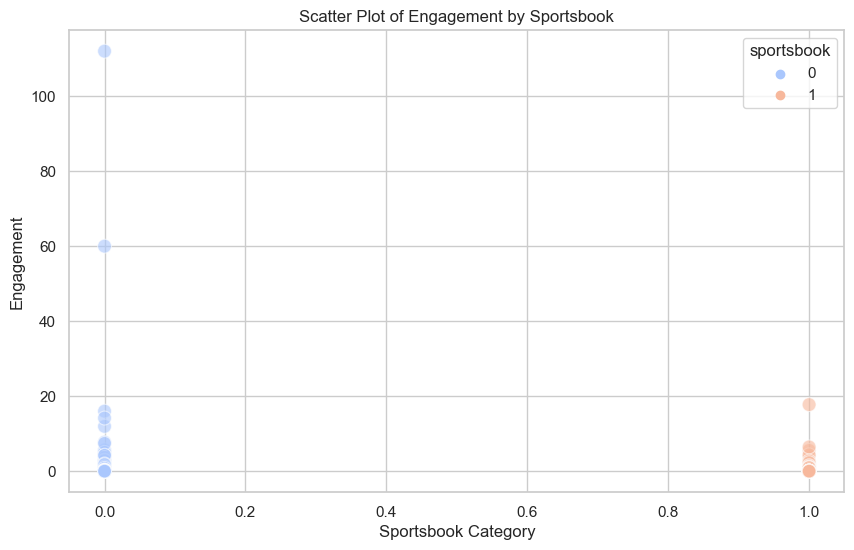

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('sportsbooks_tweetdata2.csv')

# Ensure your data does not contain null values in the relevant columns
data.dropna(subset=['engagement', 'sportsbook'], inplace=True)

# Convert 'sportsbook' to a categorical type for better plotting, if not already
data['sportsbook'] = data['sportsbook'].astype('category')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='sportsbook', y='engagement', hue='sportsbook', palette='coolwarm', s=100, alpha=0.6)

plt.title('Scatter Plot of Engagement by Sportsbook')
plt.xlabel('Sportsbook Category')
plt.ylabel('Engagement')
plt.grid(True)

plt.show()

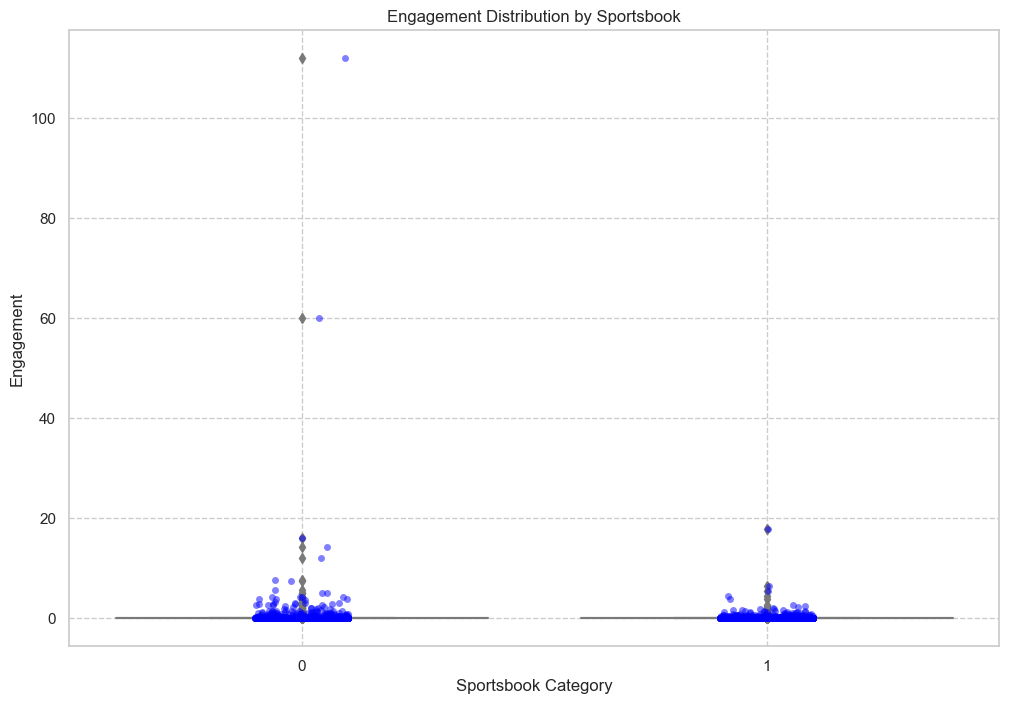

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('sportsbooks_tweetdata2.csv')

# Ensure your data does not contain null values in the relevant columns
data.dropna(subset=['engagement', 'sportsbook'], inplace=True)

# Convert 'sportsbook' to a categorical type for better plotting
data['sportsbook'] = data['sportsbook'].astype('category')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with a specified size
plt.figure(figsize=(12, 8))

# Create a boxplot to show the distribution of engagement
sns.boxplot(data=data, x='sportsbook', y='engagement', palette='coolwarm')

# Overlay a strip plot to show individual data points, with jitter added for better visibility
sns.stripplot(data=data, x='sportsbook', y='engagement', color='blue', alpha=0.5, jitter=True)

plt.title('Engagement Distribution by Sportsbook')
plt.xlabel('Sportsbook Category')
plt.ylabel('Engagement')
plt.grid(True, linestyle='--')

plt.show()